# Titanic Exercise

to install seaborn :
```bash
conda install -c conda-forge seaborn
````


In [1]:
import pandas as pd
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np

In [2]:
embarked_labels = {
  "C": "Cherbourg",
  "Q": "Queenstown",
  "S": "Southampton",
}

In [3]:
# 1. Load the dataset
titanic = load_dataset("titanic")

In [4]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
titanic.info()
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# 2. Data cleaning
# 2.1. Check the missing values
print(titanic.shape)
print(titanic.isnull().sum())

# 2.2. Replace the missing values in age with the mean
titanic["age"].fillna(titanic["age"].mean(), inplace=True)

# 2.3 Remove deck column
titanic.drop(columns=["deck"], inplace=True)

# 2.4 Remove NA for embarked
titanic.dropna(subset=["embarked"], inplace=True)

(891, 15)
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


/var/folders/w3/5hy6_w9d52l2jjrccrpq3z0h0000gn/T/ipykernel_9937/3051048072.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["age"].fillna(titanic["age"].mean(), inplace=True)


In [7]:
print(titanic.shape)
print(titanic.isnull().sum())

(889, 14)
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


# 3 Analyse data

In [8]:
# 3.1 Calculer le taux global de survie des passagers du Titanic.

# total_passengers = titanic.survived.count()
# titanic.shape[0] == len(titanic)
# survival_rate = titanic.survived.sum() / total_passengers

survival_rate = titanic.survived.mean()
survival_rate

survival_rate = titanic.survived.value_counts(normalize=True)
survival_rate

survived
0    0.617548
1    0.382452
Name: proportion, dtype: float64

In [9]:
# 3.2 Analyser la répartition des passagers par classe (Pclass) et par port d'embarquement (Embarked).
titanic.groupby(["pclass", "embarked"]).size()
titanic.groupby(["pclass", "embarked"]).survived.agg([len, np.mean])

/var/folders/w3/5hy6_w9d52l2jjrccrpq3z0h0000gn/T/ipykernel_9937/2208455465.py:3: FutureWarning: The provided callable <function mean at 0x11b6c36d0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  titanic.groupby(["pclass", "embarked"]).survived.agg([len, np.mean])


len      mean
pclass embarked               
1      C          85  0.694118
       Q           2  0.500000
       S         127  0.582677
2      C          17  0.529412
       Q           3  0.666667
       S         164  0.463415
3      C          66  0.378788
       Q          72  0.375000
       S         353  0.189802

In [10]:
# 3.3 Calculer la proportion de passagers masculins et féminins.

titanic.sex.value_counts(normalize=True)

male_proportion = titanic.loc[titanic.sex == "male"].sex.count() / titanic.shape[0]
female_proportion = 1 - male_proportion
gender_proportion = pd.Series([male_proportion, female_proportion], index=["male", "female"], name="gender_proportion")
gender_proportion

male      0.649044
female    0.350956
Name: gender_proportion, dtype: float64

In [11]:
# 3.4 Identifier la distribution d'âge des passagers et trouver les catégories d'âge les plus représentées.
age_distribution = titanic.age.astype('int').value_counts()
age_distribution

age
29    197
24     31
22     27
28     27
30     27
     ... 
66      1
53      1
80      1
12      1
74      1
Name: count, Length: 71, dtype: int64

In [12]:
bins = list(range(0, 101, 10))
labels = [f"{i}-{i+10}" for i in bins[:-1]]

binned_age = pd.cut(titanic.age, bins=bins, labels=labels, right=False)
df = pd.DataFrame({"cat": binned_age, "age": titanic["age"]}).groupby("cat").size()
df
binned_age

/var/folders/w3/5hy6_w9d52l2jjrccrpq3z0h0000gn/T/ipykernel_9937/1426674909.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.DataFrame({"cat": binned_age, "age": titanic["age"]}).groupby("cat").size()


0      20-30
1      30-40
2      20-30
3      30-40
4      30-40
       ...  
886    20-30
887    10-20
888    20-30
889    20-30
890    30-40
Name: age, Length: 889, dtype: category
Categories (10, object): ['0-10' < '10-20' < '20-30' < '30-40' ... '60-70' < '70-80' < '80-90' < '90-100']

# 4 Alives analyse

In [13]:
# 4.1 Analyser la survie en fonction de la classe des billets (Pclass)
titanic.groupby("pclass").survived.value_counts(normalize=True).unstack()

survived,0,1
pclass,,
1,0.373832,0.626168
2,0.527174,0.472826
3,0.757637,0.242363


In [14]:
# 4.2 Examiner la survie en fonction du genre (Sex) des passagers.
# titanic.groupby("sex").survived.value_counts().unstack()
survival_by_class = titanic.groupby(["pclass", "sex", "survived"]).size().reset_index(name="count")
survival_by_class["percentage"] = survival_by_class["count"] / survival_by_class.groupby("pclass")["count"].transform("sum")
survival_by_class


,pclass,sex,survived,count,percentage
0,1,female,0,3,0.014019
1,1,female,1,89,0.415888
2,1,male,0,77,0.359813
3,1,male,1,45,0.210280
4,2,female,0,6,0.032609
5,2,female,1,70,0.380435
6,2,male,0,91,0.494565
7,2,male,1,17,0.092391
8,3,female,0,72,0.146640
9,3,female,1,72,0.146640


In [15]:
display(titanic)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [16]:
# 4.3 Étudier la survie en fonction de l'âge (Age) des passagers.

titanic["binned_age"] = binned_age

In [24]:
titanic.groupby("binned_age").survived.value_counts(normalize=True).unstack()


/var/folders/w3/5hy6_w9d52l2jjrccrpq3z0h0000gn/T/ipykernel_9937/2480269593.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby("binned_age").survived.value_counts(normalize=True).unstack()


survived,0,1
binned_age,,
0-10,0.387097,0.612903
10-20,0.598039,0.401961
20-30,0.675063,0.324937
30-40,0.566265,0.433735
40-50,0.617978,0.382022
50-60,0.583333,0.416667
60-70,0.722222,0.277778
70-80,1.000000,0.000000
80-90,0.000000,1.000000


In [25]:
# 4.4 Analyser la survie en fonction du port d'embarquement (Embarked).

survival_by_embarkation = titanic.groupby('embarked')['survived'].value_counts(normalize=True).unstack() * 100
survival_by_embarkation

survived,0,1
embarked,,
C,44.642857,55.357143
Q,61.038961,38.961039
S,66.304348,33.695652


# 5 Plottings

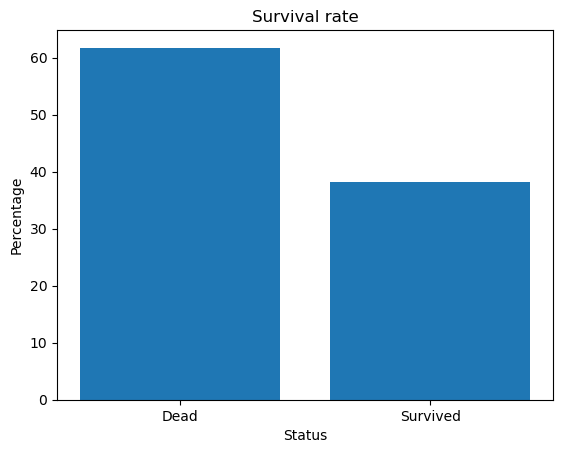

In [18]:
# 5.1 Créer un diagramme à barres (plt.bar) pour visualiser le taux de survie global.
plt.bar(["Dead", "Survived"], survival_rate*100)
plt.title("Survival rate")
plt.xlabel("Status")
plt.ylabel("Percentage")

plt.show()

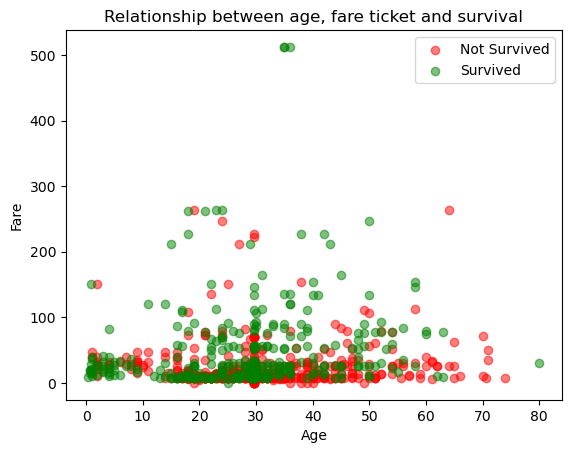

In [19]:
# 5.2 Créer un nuage de points (plt.scatter) pour représenter la relation entre l'âge (Age) et le prix du billet (Fare) en fonction de la survie.
plt.scatter(
  titanic[titanic.survived == 0].age, 
  titanic[titanic.survived == 0].fare,
  color="red", label="Not Survived", alpha=0.5)
plt.scatter(
  titanic[titanic.survived == 1].age, 
  titanic[titanic.survived == 1].fare,
  color="g", label="Survived", alpha=0.5)

plt.legend()
plt.title("Relationship between age, fare ticket and survival")
plt.xlabel("Age")
plt.ylabel("Fare")

plt.show()

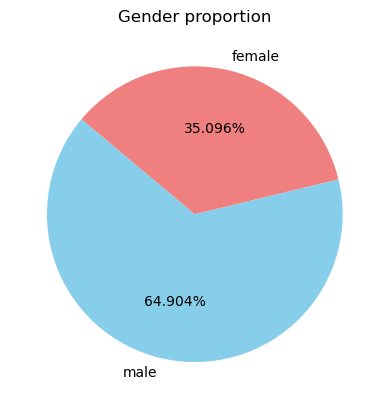

In [45]:
# 5.3 Produire un diagramme circulaire (Pie chart) pour montrer la proportion de passagers masculins et féminins. Exemple de diagramme circulaire

gender = titanic.sex.value_counts()
plt.pie(gender.values, labels=gender.index, autopct="%.3f%%", startangle=140, colors=['skyblue', 'lightcoral'])

plt.title("Gender proportion")
plt.show()

embarked,C,Q,S
pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


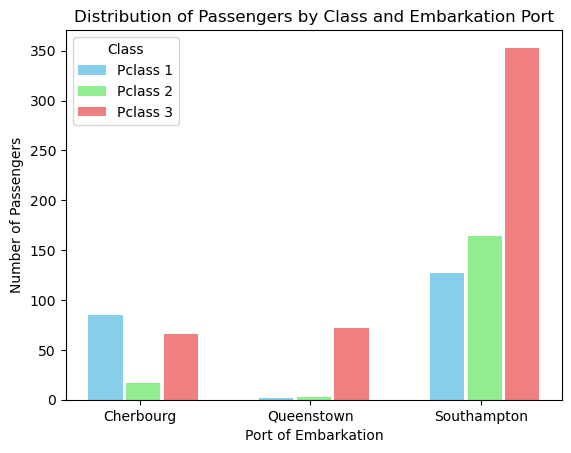

Index([1, 2, 3], dtype='int64', name='pclass')

In [60]:
# 5.5 Générer un graphique en barres (plt.bar) pour montrer la répartition des passagers par classe (Pclass) et par port d'embarquement (Embarked).

distribution_by_class_embarked = titanic.groupby(["pclass", "embarked"]).size().unstack()
display(distribution_by_class_embarked)

fig, ax = plt.subplots()
width = 0.2
spacing = 0.02
class_labels = distribution_by_class_embarked.columns.map(lambda city_initial: embarked_labels.get(city_initial))

for i, (pclass, color) in enumerate(zip(distribution_by_class_embarked.index, ["skyblue", "lightgreen", "lightcoral"])):
  positions: list[int | float] = list(range(len(class_labels))) if i==0 else [pos + width + spacing for pos in positions]
  plt.bar(positions, distribution_by_class_embarked.loc[pclass], width=width, label=f'Pclass {pclass}', color=color)

# Adding labels and title
plt.title('Distribution of Passengers by Class and Embarkation Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Number of Passengers')
plt.xticks([pos + width for pos in range(len(class_labels))], class_labels)
plt.legend(title='Class')

# Show the plot
plt.show()
distribution_by_class_embarked.index

# 6 Bonus for the datascients experts ;P

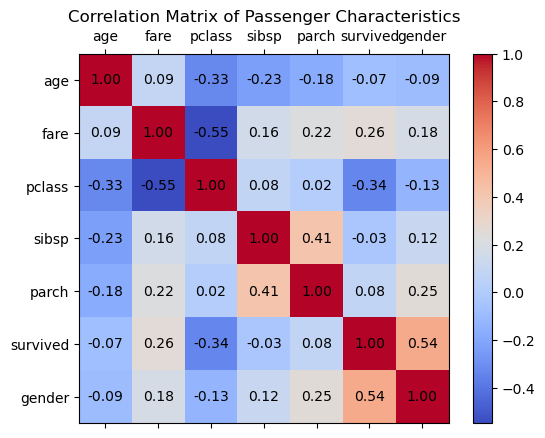

In [67]:
# 6.1 Examine the correlation between different passenger characteristics to identify meaningful relationships.

titanic['gender'] = titanic['sex'].map({'male': 0, 'female': 1})
correlation_columns = ['age', 'fare', 'pclass', 'sibsp', 'parch', 'survived', 'gender']

correlation_matrix = titanic[correlation_columns].corr()

fig, ax = plt.subplots()
cax = ax.matshow(correlation_matrix, cmap="coolwarm")
fig.colorbar(cax)

# Set labels
ax.set_xticks(np.arange(len(correlation_columns)))
ax.set_yticks(np.arange(len(correlation_columns)))
ax.set_xticklabels(correlation_columns)
ax.set_yticklabels(correlation_columns)

# Display the correlation values
for i in range(len(correlation_columns)):
  for j in range(len(correlation_columns)):
    text = ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

# Set title
plt.title('Correlation Matrix of Passenger Characteristics')

# Show the plot
plt.show()

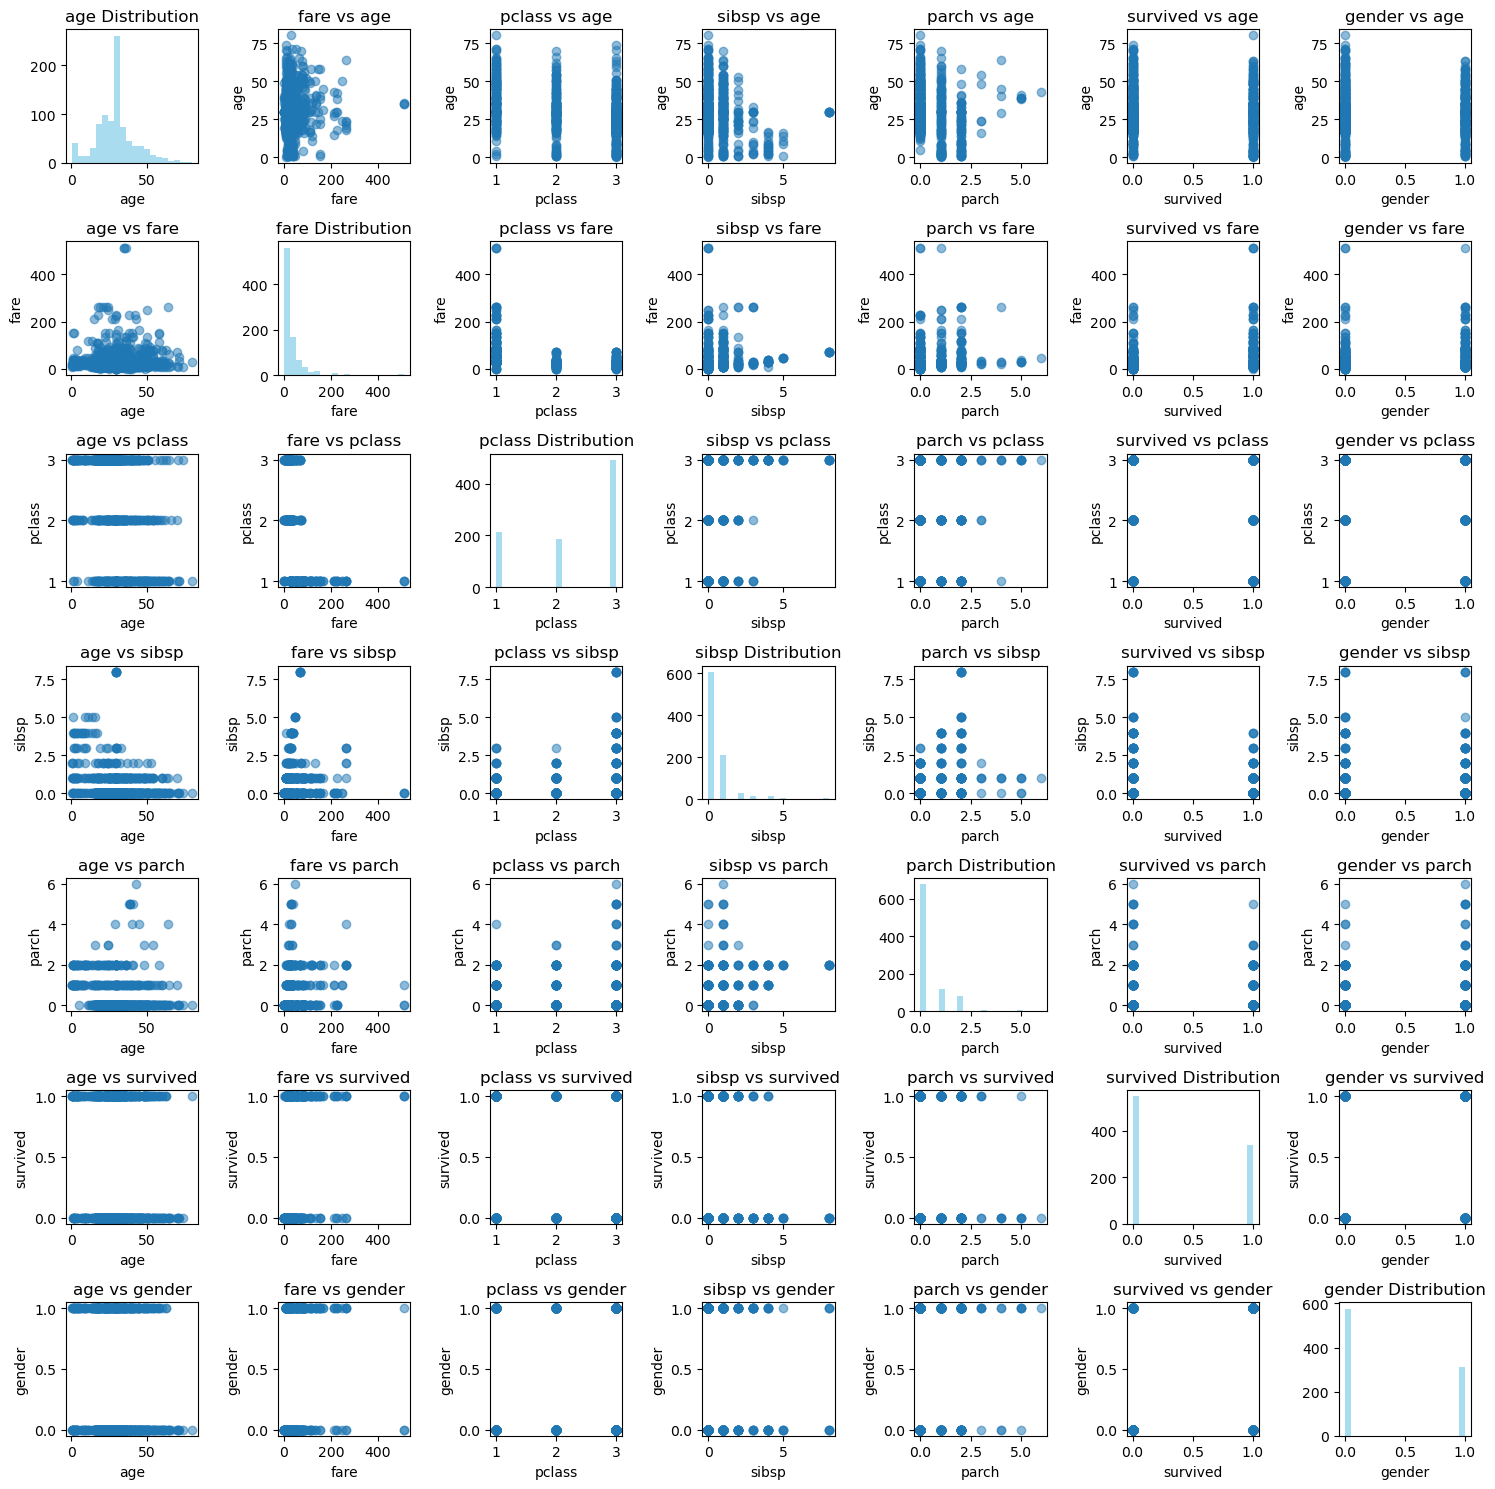

In [68]:
# Select relevant numerical columns
numerical_columns = ['age', 'fare', 'pclass', 'sibsp', 'parch', 'survived', 'gender']

# Create a matrix of scatter plots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=len(numerical_columns), figsize=(15, 15))

for i in range(len(numerical_columns)):
    for j in range(len(numerical_columns)):
        if i == j:
            axes[i, j].hist(titanic[numerical_columns[i]], bins=20, color='skyblue', alpha=0.7)
            axes[i, j].set_title(f'{numerical_columns[i]} Distribution')
            axes[i, j].set_xlabel(numerical_columns[i])
        else:
            axes[i, j].scatter(titanic[numerical_columns[j]], titanic[numerical_columns[i]], alpha=0.5)
            axes[i, j].set_title(f'{numerical_columns[j]} vs {numerical_columns[i]}')
            axes[i, j].set_xlabel(numerical_columns[j])
            axes[i, j].set_ylabel(numerical_columns[i])

# Adjust layout
plt.tight_layout()
plt.show()